 # <center> Interpolazione 1D e Uncertainty Evaluation</center>

In [1]:
import pandas as pd
import numpy as np 
import scipy as smp
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','notebook'])

In [2]:
dfg=pd.read_excel('Datas.xlsx')
dfg.columns=[r"Reg(cm)","Shim(digit)","initial_Reg","initial_shim","Diff. $\rho$","Int. $\rho$","Time","STD_Time $\sigma$"]
dfg

,Reg(cm),Shim(digit),initial_Reg,initial_shim,Diff. $\rho$,Int. $\rho$,Time,STD_Time $\sigma$
0,12.589565,548,258,356,0.001474,0.002516,14.730000,1.373806
1,15.736957,518,356,413,0.001002,0.003518,26.193000,1.112965
2,18.111304,496,413,456,0.000711,0.004228,41.381000,0.903025
3,20.099130,481,456,492,0.000656,0.004884,45.790000,1.711198
4,24.571739,465,492,573,0.001543,0.006427,13.683333,1.039359
5,28.989130,435,573,653,0.001166,0.007593,21.093750,1.064907
6,34.731739,410,653,757,0.000907,0.008501,30.006250,1.821780
7,38.100000,389,757,818,0.000164,0.008665,220.750000,16.875595


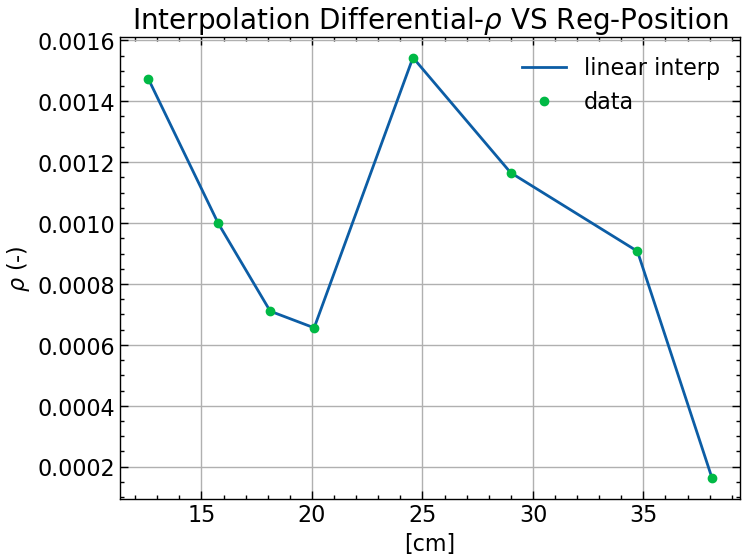

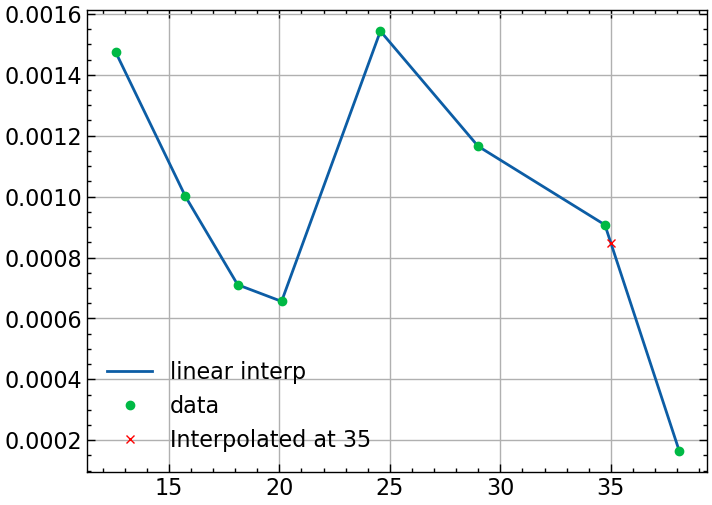

In [3]:
x = dfg.iloc[:,0]
y = dfg.iloc[:,4]

xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew = np.interp(xnew, x, y)

plt.title(r'Interpolation Differential-$\rho$ VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$\rho$ (-)')
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 35
specific_y = np.interp(specific_x, x, y)

plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.plot(specific_x, specific_y, 'rx', label=f'Interpolated at {specific_x}')
plt.legend(loc='best')
plt.grid()
plt.show()

In [4]:
gamma=dfg.iloc[0,0]
zeet=dfg.iloc[-1,0]
zeet

38.1

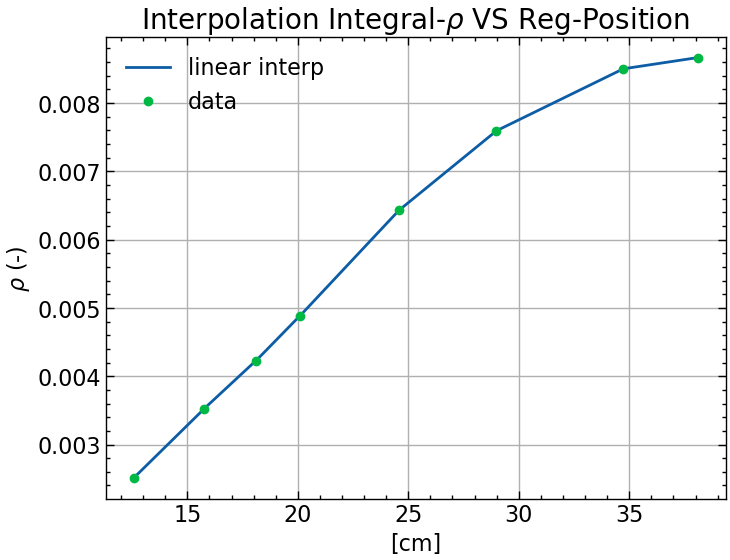

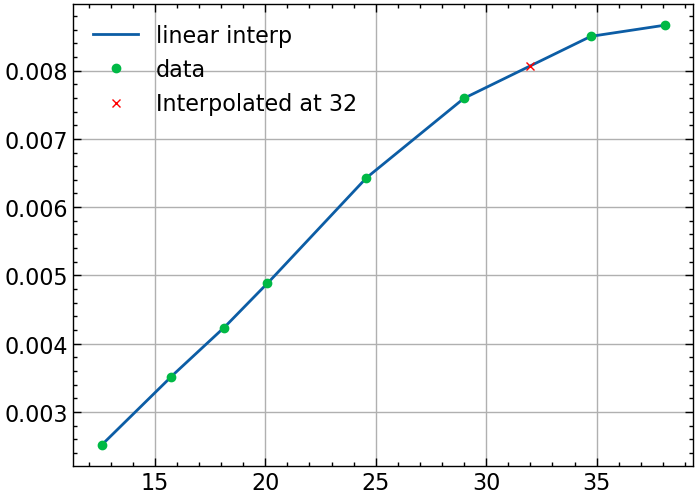

In [5]:
x = dfg.iloc[:,0]
y = dfg.iloc[:,5]

xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew_Irho = np.interp(xnew, x, y)

plt.title(r'Interpolation Integral-$\rho$ VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$\rho$ (-)')
plt.plot(xnew, ynew_Irho, '-', label='linear interp')
plt.plot(x, y,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 32
specific_y = np.interp(specific_x, x, y)

plt.plot(xnew, ynew_Irho, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.plot(specific_x, specific_y, 'rx', label=f'Interpolated at {specific_x}')
plt.legend(loc='best')
plt.grid()
plt.show()

 # inteprolare la funzione del tempo in modo tale che il numero di elementi matcha sia per la funzione del tempo che la funzione delle $\rho$

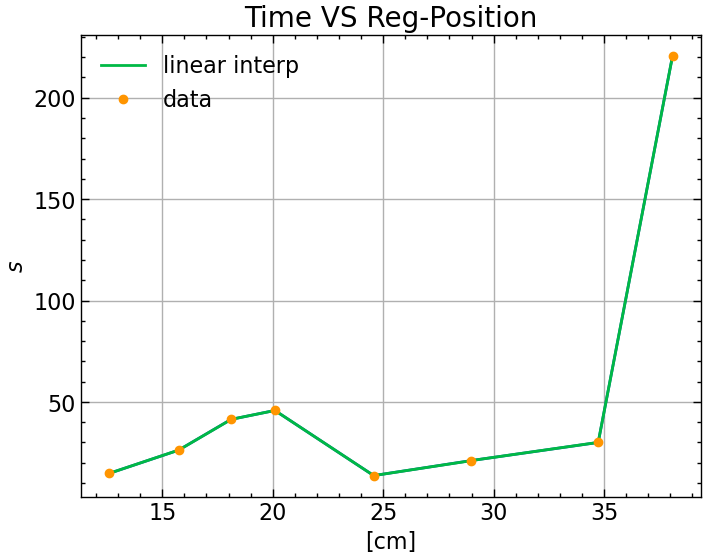

In [6]:
T=dfg.iloc[:,6]
plt.plot(x,T)

x = dfg.iloc[:,0]
yT = dfg.iloc[:,6]

xnewT = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew_T = np.interp(xnewT, x, yT)

plt.title(r'Time VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$s$')
plt.plot(xnewT, ynew_T, '-', label='linear interp')
plt.plot(x, yT,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 35
specific_y = np.interp(specific_x, x, yT)

# <center> Valutazione dell'errore </center>

---

Bisogna calcolare il valore dell'incertezza totale della misura cioè $\delta R$<br>
In questo caso abbiamo che la variabile $R$ corrisponde alla reattività $\rho$, mentre la variabile di incertezza è $T$ cioè il tempo.
$$\delta R=\bigg \{\sum^{N}_{i=0} \bigg(\frac{\partial R}{\partial X_i} \delta X_i\bigg)^2 \bigg\}^{1/2}$$
Il valore delle barre di errore per singola misura è 
$$\delta R_i= \frac{\partial R}{\partial X_i} \delta X_i$$
---

Uso come variabili :<br>
$\verb|drdt|=\frac{\partial R}{\partial X_i}$<br>
$\verb|drdtdt|=\frac{\partial R}{\partial X_i} \delta X_i$<br>
$\verb|dr|=\bigg \{\sum^{N}_{i=0} \bigg(\frac{\partial R}{\partial X_i} \delta X_i\bigg)^2 \bigg\}^{1/2}$



In [7]:
drdt=np.gradient(dfg["Int. $\rho$"],dfg["Time"])
drdt

array([8.73881664e-05, 6.99264025e-05, 1.25837758e-04, 1.80120402e-04,
       2.18911538e-04, 1.32109126e-04, 9.73159152e-05, 8.61346458e-07])

In [8]:
drdtdt=drdt*2*dfg["STD_Time $\sigma$"]
dr=np.sqrt(np.sum((drdtdt)**2))
drdtdt

0    0.000240
1    0.000156
2    0.000227
3    0.000616
4    0.000455
5    0.000281
6    0.000355
7    0.000029
Name: STD_Time $\sigma$, dtype: float64

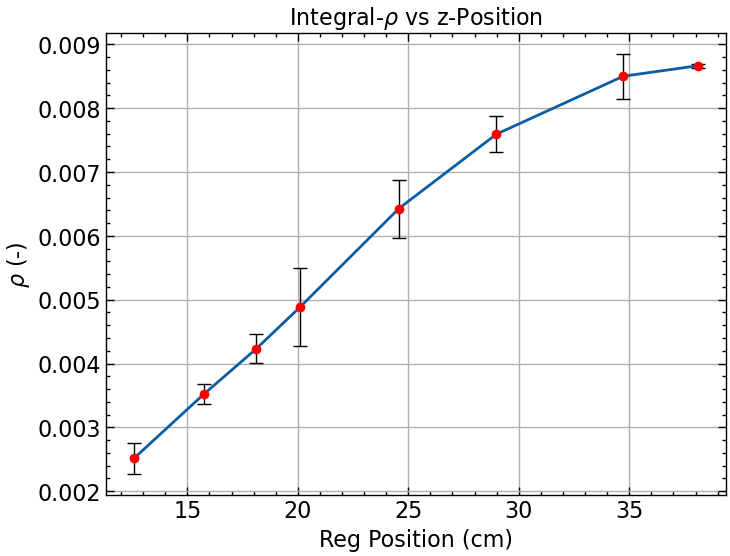

In [9]:
y_err=drdtdt
plt.errorbar(x, y,yerr=y_err,ecolor = 'k',elinewidth = 1, capsize=5,markeredgewidth=1,fmt='o',label='Error bar',color='r')
plt.title(r'Integral-$\rho$ vs z-Position')
plt.xlabel('Reg Position (cm)')
plt.ylabel(r'$\rho$ (-)')
plt.plot(dfg["Reg(cm)"], dfg["Int. $\rho$"], label='data')
plt.grid()

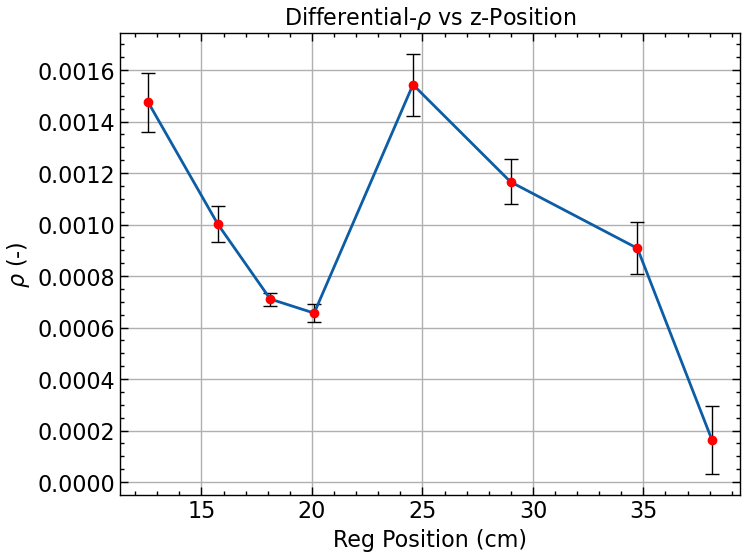

In [10]:
drdt=np.gradient(dfg["Diff. $\rho$"],dfg["Time"])
drdt

drdtdt=drdt*2*dfg["STD_Time $\sigma$"]
dr=np.sqrt(np.sum((drdtdt)**2))
drdtdt

y_err=drdtdt
plt.errorbar(dfg["Reg(cm)"], dfg["Diff. $\rho$"],yerr=y_err,ecolor = 'k',elinewidth = 1, capsize=5,markeredgewidth=1,fmt='o',label='Error bar',color='r')
plt.title(r'Differential-$\rho$ vs z-Position')
plt.xlabel('Reg Position (cm)')
plt.ylabel(r'$\rho$ (-)')
plt.plot(dfg["Reg(cm)"], dfg["Diff. $\rho$"], label='data')
plt.grid()

Interpolazione con cubic-spline

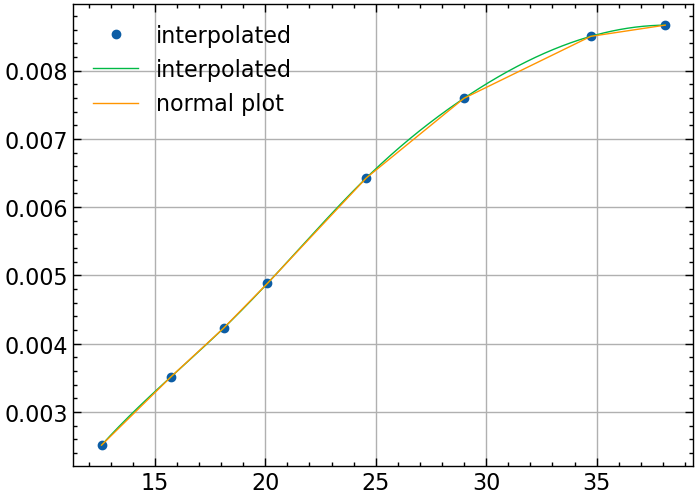

In [13]:
from scipy.interpolate import interp1d
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001, endpoint=True)
plt.plot(x, y, 'o', xnew, f2(xnew), '-',lw=1,label="interpolated")
plt.plot(x,y,lw=1,label="normal plot")
plt.legend()
plt.grid()